In [3]:
# Pan card fraud detection- DataFlair
import os
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

ImportError: numpy.core.multiarray failed to import

ImportError: numpy.core.multiarray failed to import

In [4]:
img_size = 100
datadir = r'images'    # root data directiory 
CATEGORIES = os.listdir(datadir)
print(CATEGORIES)

['fake', 'real']


In [5]:
# Preprocessing Function
def PreProcess(img_size, path):
    """This function reads images from the given folders subfolder 
        and returns a normalized array along with their respective classes"""
    x, y = [], []
    CATEGORIES = os.listdir(path)
    print("Found {} classes: {}".format(len(CATEGORIES), CATEGORIES))
    
    for category in CATEGORIES:
        path = os.path.join(datadir, category)
        classIndex = CATEGORIES.index(category)
        
        for imgs in tqdm(os.listdir(path)):
            img_arr = cv2.imread(os.path.join(path, imgs))

            # resize the image
            resized_array = cv2.resize(img_arr, (img_size, img_size))
            cv2.imshow("images", resized_array)
            cv2.waitKey(1)
            # Normalize the image 
            resized_array = resized_array/255.0
            x.append(resized_array)
            y.append(classIndex)
    cv2.destroyAllWindows()
    return x, y, CATEGORIES

x, y, CATEGORIES = PreProcess(img_size, datadir)



  0%|          | 0/14 [00:00<?, ?it/s]

Found 2 classes: ['fake', 'real']


100%|██████████| 14/14 [00:00<00:00, 132.45it/s]


In [6]:
# Split the dataset into training and testing
X_train, x_test, Y_train, y_test = train_test_split(x, y, random_state=42)

# Convert all the list to numpy array
X_train = np.array(X_train)
x_test = np.array(x_test)
Y_train = np.array(Y_train)
y_test = np.array(y_test)

In [15]:
# Build the model
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(img_size, img_size, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), strides=2, activation="relu"))
model.add(Conv2D(64, (3, 3),  activation="relu"))
model.add(Conv2D(8, (3, 3), strides=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 8)         4616      
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)               

In [16]:
history = model.fit(X_train, Y_train, batch_size = 2, epochs=15, verbose=1)

Epoch 1/15
11/11 [==============================] - 0s 3ms/step - loss: 0.7281 - accuracy: 0.3810
Epoch 2/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5238
Epoch 3/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.6190
Epoch 4/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.7619
Epoch 5/15
11/11 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.6190
Epoch 6/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.7143
Epoch 7/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.6667
Epoch 8/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.7619
Epoch 9/15
11/11 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.9048
Epoch 10/15
11/11 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9048
Epoch 11/15
11/11 [

In [20]:
accuracy = history.history['accuracy']
loss = history.history['loss']

Text(0.5, 1.0, 'Loss')

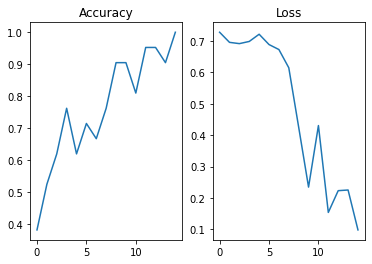

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(accuracy)
ax1.set_title("Accuracy")
ax2.plot(loss)
ax2.set_title('Loss')

In [30]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 381ms/step - loss: 0.3115 - accuracy: 0.8571


[0.3114681839942932, 0.8571428656578064]

In [42]:
# Load images
img_real = cv2.cvtColor(cv2.imread('cards/real.jpg'), cv2.COLOR_BGR2RGB)
img_fake = cv2.cvtColor(cv2.imread('cards/fake.jpg'), cv2.COLOR_BGR2RGB)
real = np.expand_dims(cv2.resize(img_real, (img_size, img_size)), axis=0)/255.0
fake = np.expand_dims(cv2.resize(img_fake, (img_size, img_size)), axis=0)/255.0

Text(0.5, 1.0, 'Fake')

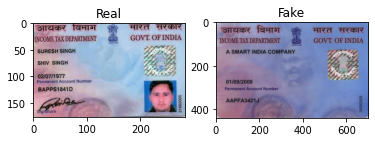

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_real)
ax1.set_title("Real")
ax2.imshow(img_fake)
ax2.set_title('Fake')

In [50]:
# Predict from a image
pred1 = model.predict(real)
pred2 = model.predict(fake)
CATEGORIES[np.argmax(pred1)], CATEGORIES[np.argmax(pred2)]

('real', 'fake')

In [49]:
# Export the model
model.save("pan-card-fraud-detection-DataFlair.h5")